In [1]:
import scanpy as sc
import scFates as scf
scf.set_figure_pubready()
sc.set_figure_params(dpi=300)

In [2]:
adata=sc.read("adata_fitted.h5ad")

In [3]:
# scf.tl.test_association(adata,reapply_filters=True,A_cut=1.2)

# adata=adata[:,adata.var.signi]

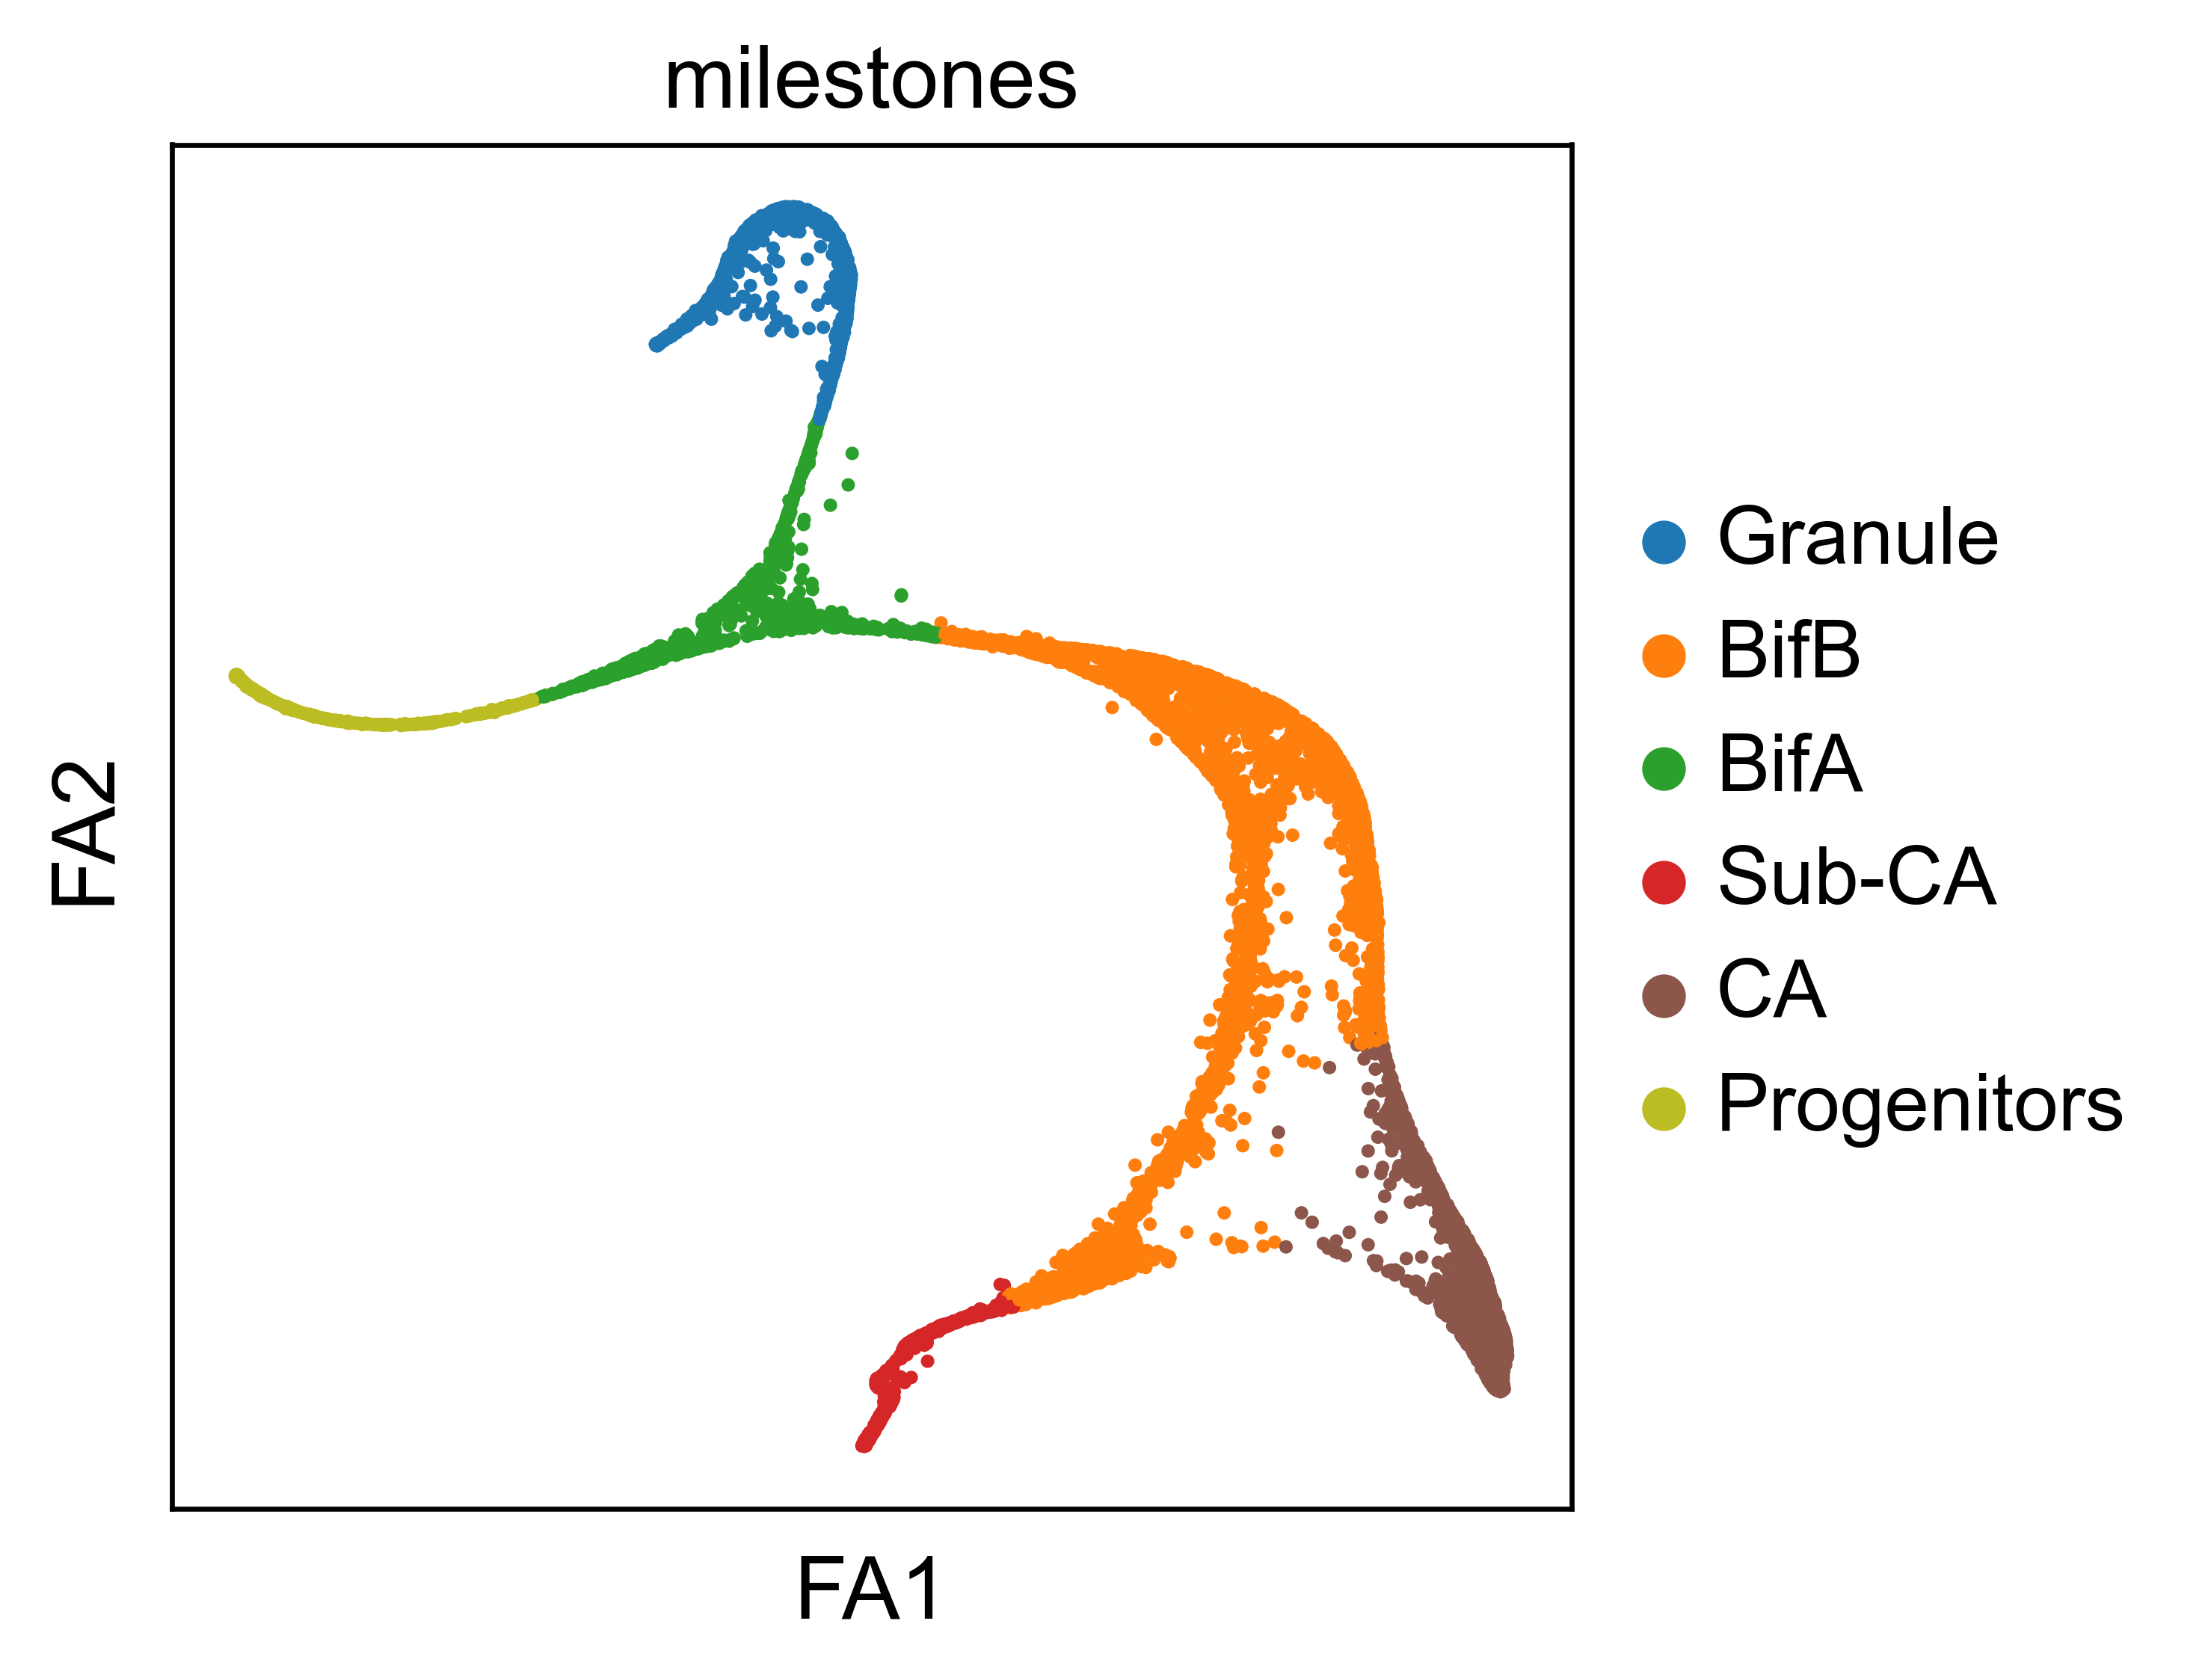

In [4]:
sc.pl.draw_graph(adata,color="milestones",palette=["tab:blue","tab:orange","tab:green","tab:red","tab:brown","tab:olive"])

In [5]:
root_milestone="Progenitors"
milestones=["Granule","BifB"]

/tmp/ipykernel_2636569/2624299868.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb1 = matplotlib.colorbar.ColorbarBase(cbaxes, cmap=cm.viridis,


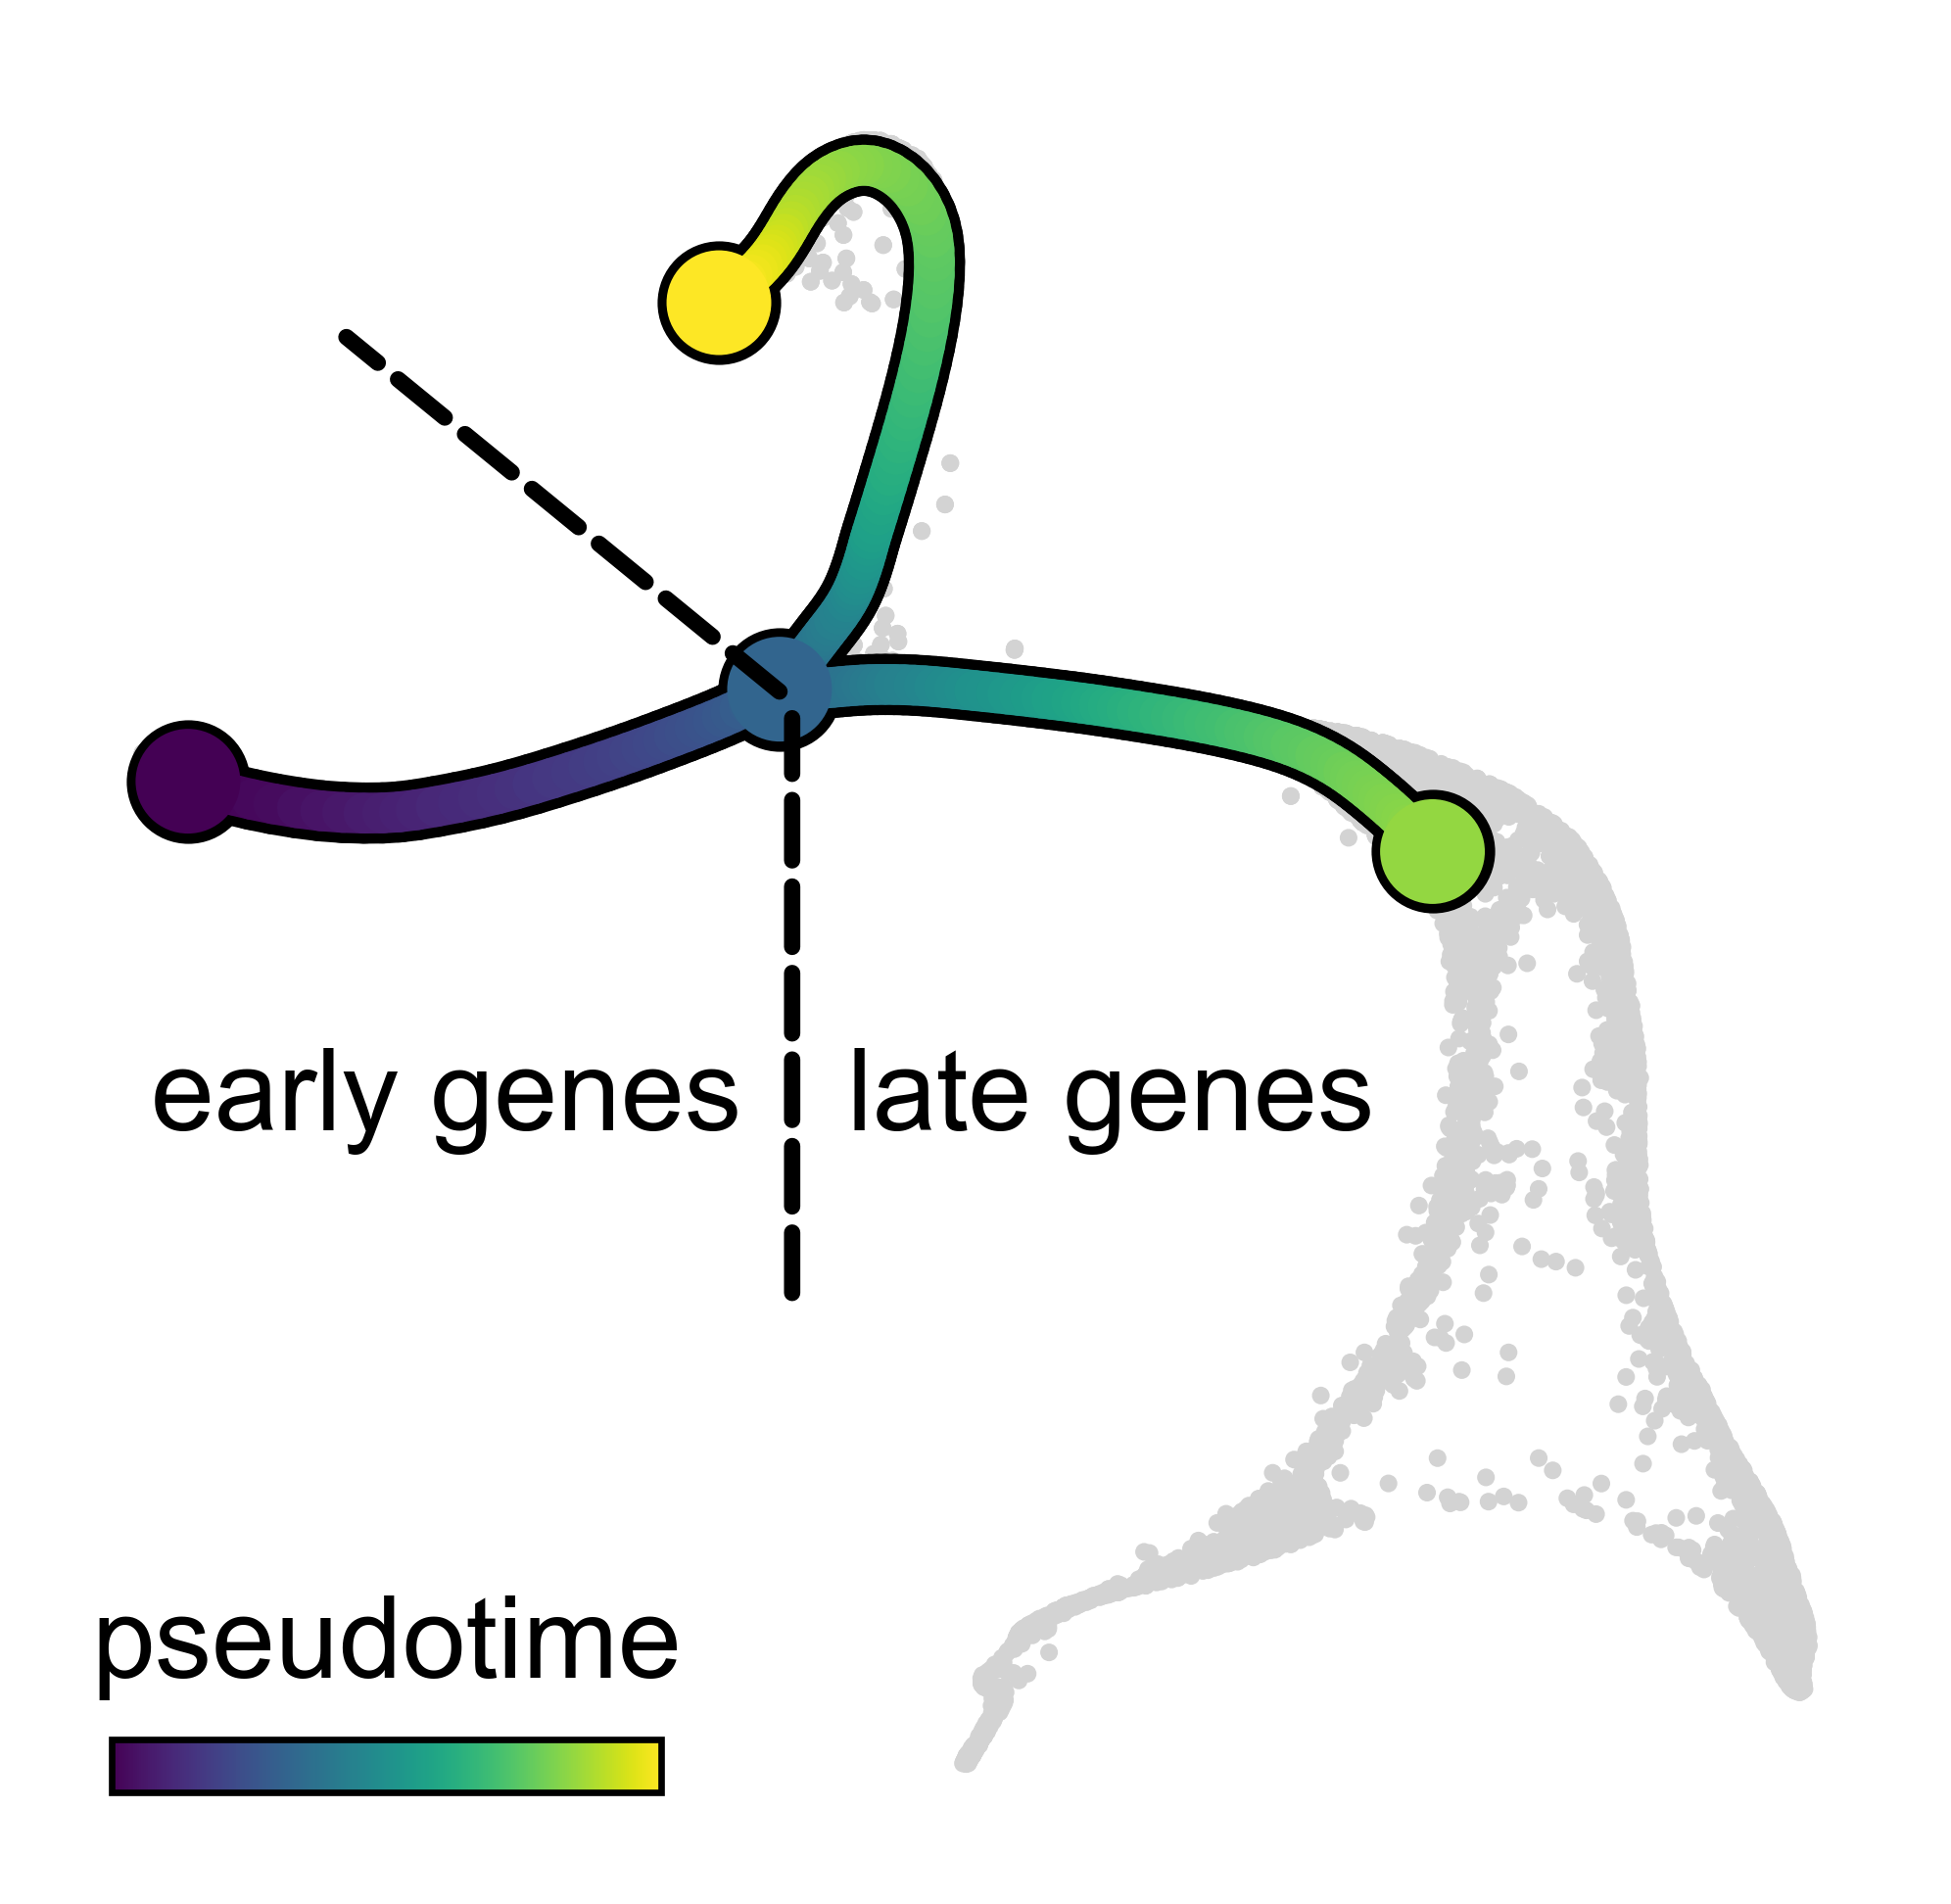

In [6]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
sc.set_figure_params(dpi=300)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ax=scf.pl.trajectory(adata,basis="draw_graph_fa",root_milestone=root_milestone,milestones=milestones,frameon=False,show=False)
cbaxes = inset_axes(ax, width="30%", height="3%",loc=3) 

cb1 = matplotlib.colorbar.ColorbarBase(cbaxes, cmap=cm.viridis,
                                orientation='horizontal'  ,ticklocation="top",                    
                                ticks=[],label="pseudotime",
                                )
ax.annotate("",xy=(0.15,.85),xytext=(0.4,0.64),xycoords="axes fraction",
  arrowprops={"arrowstyle":"-","linestyle":"--","linewidth":2},zorder=10000)

ax.annotate("",xy=(0.4,0.64),xytext=(0.4,0.3),xycoords="axes fraction",
  arrowprops={"arrowstyle":"-","linestyle":"--","linewidth":2},zorder=10000)

ax.annotate("early genes",xy=(0.05,0.4),xycoords="axes fraction",zorder=10000,size=14)
ax.annotate("late genes",xy=(0.43,0.4),xycoords="axes fraction",zorder=10000,size=14)

plt.savefig("figures/early_pseudotime.pdf")

In [7]:
import scvelo as scv

saving figure to file ./figures/scvelo_overview.pdf


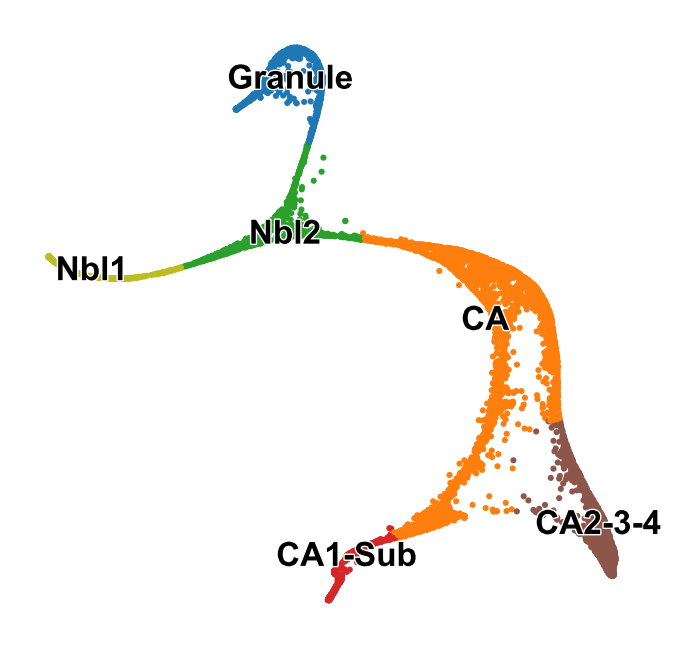

In [8]:
scv.set_figure_params(figsize=(4,4))
scf.tl.rename_milestones(adata,["Granule","CA","Nbl2","CA1-Sub","CA2-3-4","Nbl1"])
scv.pl.draw_graph(adata,color="milestones",palette=["tab:blue","tab:orange","tab:green","tab:red","tab:brown","tab:olive"],
                  title="",save="overview.pdf")

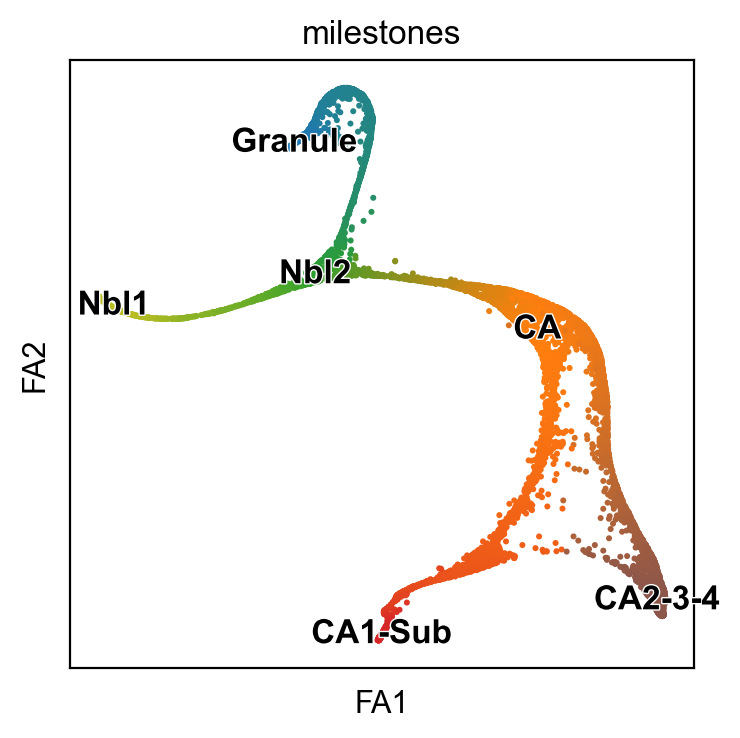

In [9]:
scf.pl.milestones(adata,annotate=True)

In [10]:
root_milestone="Nbl1"

milestones=["Granule","CA"]

In [11]:
scf.tl.test_fork(adata,root_milestone,milestones,n_jobs=40,rescale=True)

testing fork
    single mapping
    Differential expression: 100%|██████████| 2306/2306 [00:59<00:00, 38.89it/s]
    test for upregulation for each leave vs root
    upreg CA: 100%|██████████| 601/601 [00:01<00:00, 599.35it/s]
    finished (0:01:04) --> added 
    .uns['Nbl1->Granule<>CA']['fork'], DataFrame with fork test results.


In [12]:
scf.tl.branch_specific(adata,root_milestone,milestones,effect=.3)

    branch specific features: Granule: 264, CA: 70
    finished --> updated 
    .uns['Nbl1->Granule<>CA']['fork'], DataFrame updated with additionnal 'branch' column.


In [13]:
#scf.tl.activation_lm(adata,root_milestone,milestones,n_jobs=20)

In [14]:
scf.tl.activation(adata,root_milestone,milestones,deriv_cut=.1,n_jobs=20)

testing activation
    to CA: 100%|██████████| 70/70 [00:01<00:00, 52.91it/s]
    threshold pseudotime is: 0.8480144665700962
    37 early and 227 late features specific to leave Granule
    24 early and 46 late features specific to leave CA
    finished (0:00:25) --> updated 
    .uns['Nbl1->Granule<>CA']['fork'], DataFrame updated with additionnal 'activation' and 'module' columns.


In [15]:
#scf.tl.activation(adata,root_milestone,milestones,deriv_cut=.1,n_jobs=80,n_map=100)

In [16]:
scf.tl.slide_cells(adata,root_milestone,milestones,win=200)

--> added 
    .uns['Nbl1->Granule<>CA']['cell_freq'], probability assignment of cells on 16 non intersecting windows.


In [17]:
scf.tl.slide_cors(adata,root_milestone,milestones)

--> added 
    .uns['Nbl1->Granule<>CA']['corAB'], gene-gene correlation modules.


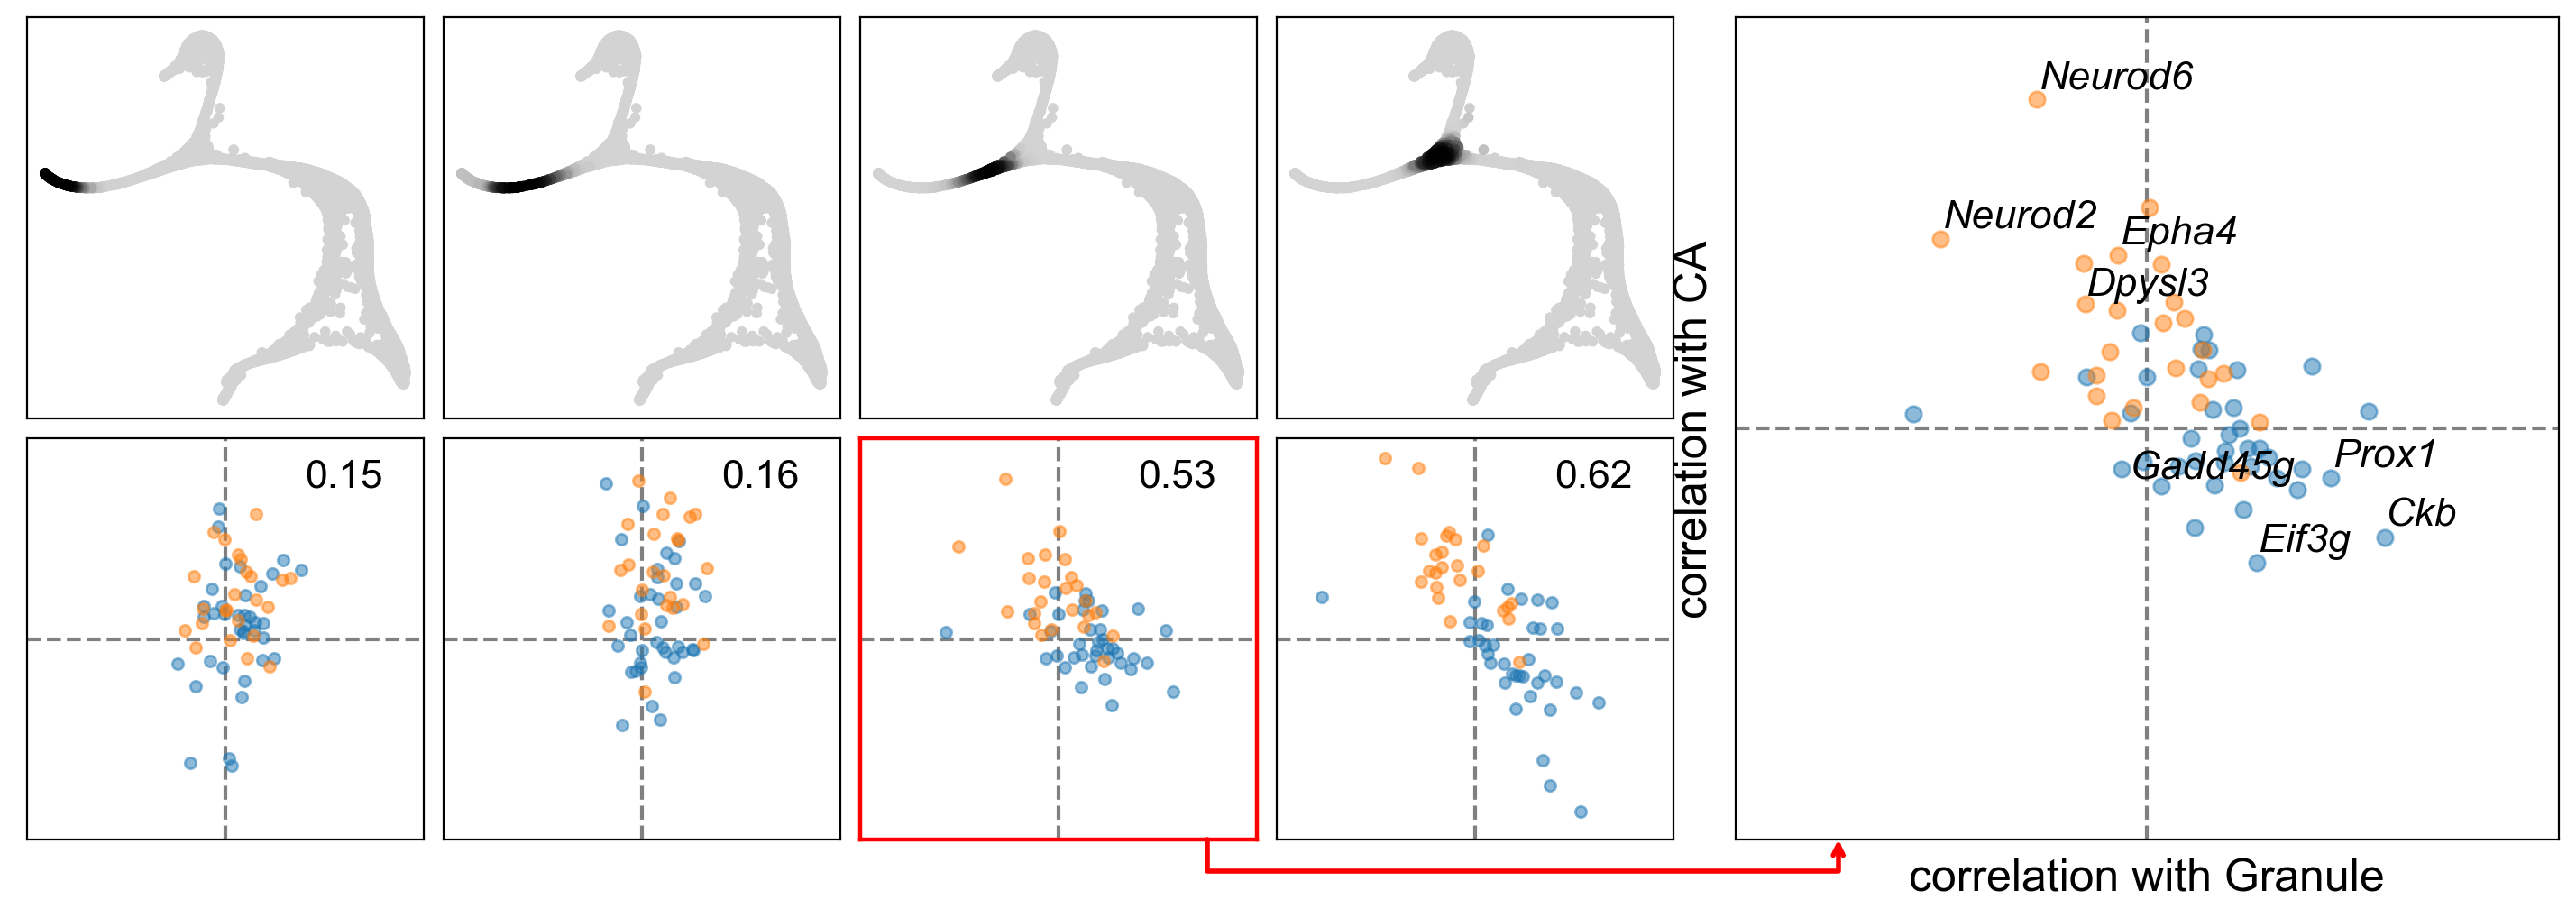

In [18]:
scf.pl.slide_cors(adata,root_milestone,milestones,basis="draw_graph_fa",
                  win_keep=[0,1,2,3],focus=2,kwargs_text=dict(fontsize=16,style="italic"),
                  save="CA_vs_Granule.pdf")

In [19]:
print("\n".join(scf.get.fork_stats(adata,root_milestone,milestones,"early","Granule").index))

Cacybp
Prox1
Sobp
Atp5b
Nme1
Cygb
Hist3h2ba
Sstr2
Bzw2
Hsp90aa1
Ckb
Hecw1
Gadd45g
Ube2e1
Synpr
Stmn4
Cct5
Pcp4
Nrxn1
Sod2
Tmem178
Nol4
Nanos1
Nsmf
Psmd4
Rwdd3
Ndufb5
Ccl27a
Jun
Eif3i
Ssu72
Lrpap1
Serbp1
Slc6a6
Kcnk1
Eif3g
Aplp2


In [20]:
sc.pp.neighbors(adata,n_neighbors=300,use_rep="X_diffusion_multiscale")

In [21]:
adata.layers["knn_smoothed"]=adata.obsp["connectivities"].dot(adata.X)

In [22]:
adata_s=scf.tl.simplify(adata,copy=True)

simplifying graph
node 10 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:05) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> graph simplified


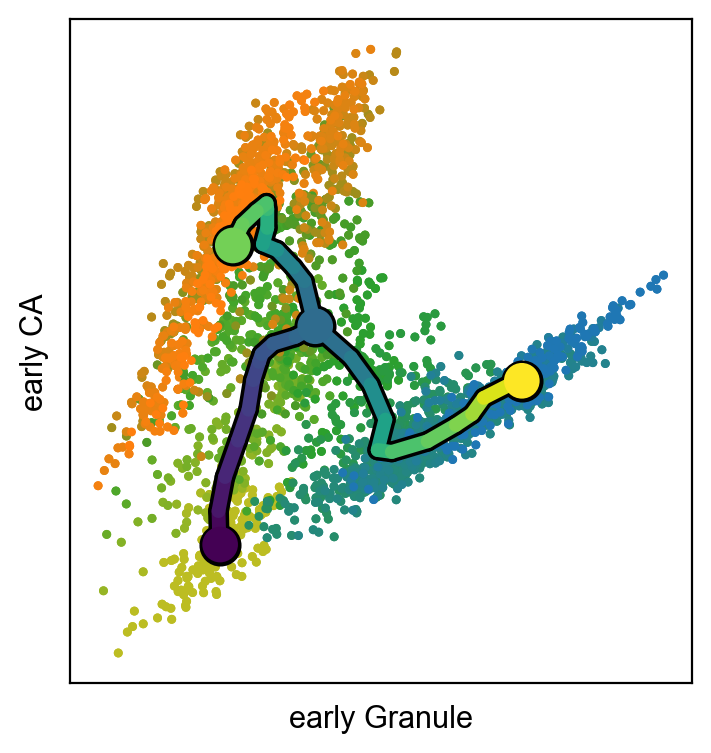

In [23]:
import matplotlib.pyplot as plt
ax=scf.pl.modules(adata,root_milestone,milestones,layer="knn_smoothed",module="early",show=False)
scf.pl.modules(adata_s,root_milestone,milestones,layer="knn_smoothed",show_traj=True,module="early",alpha=0,ax_early=ax,show=False)
plt.savefig("figures/upreg_early.pdf",dpi=300)

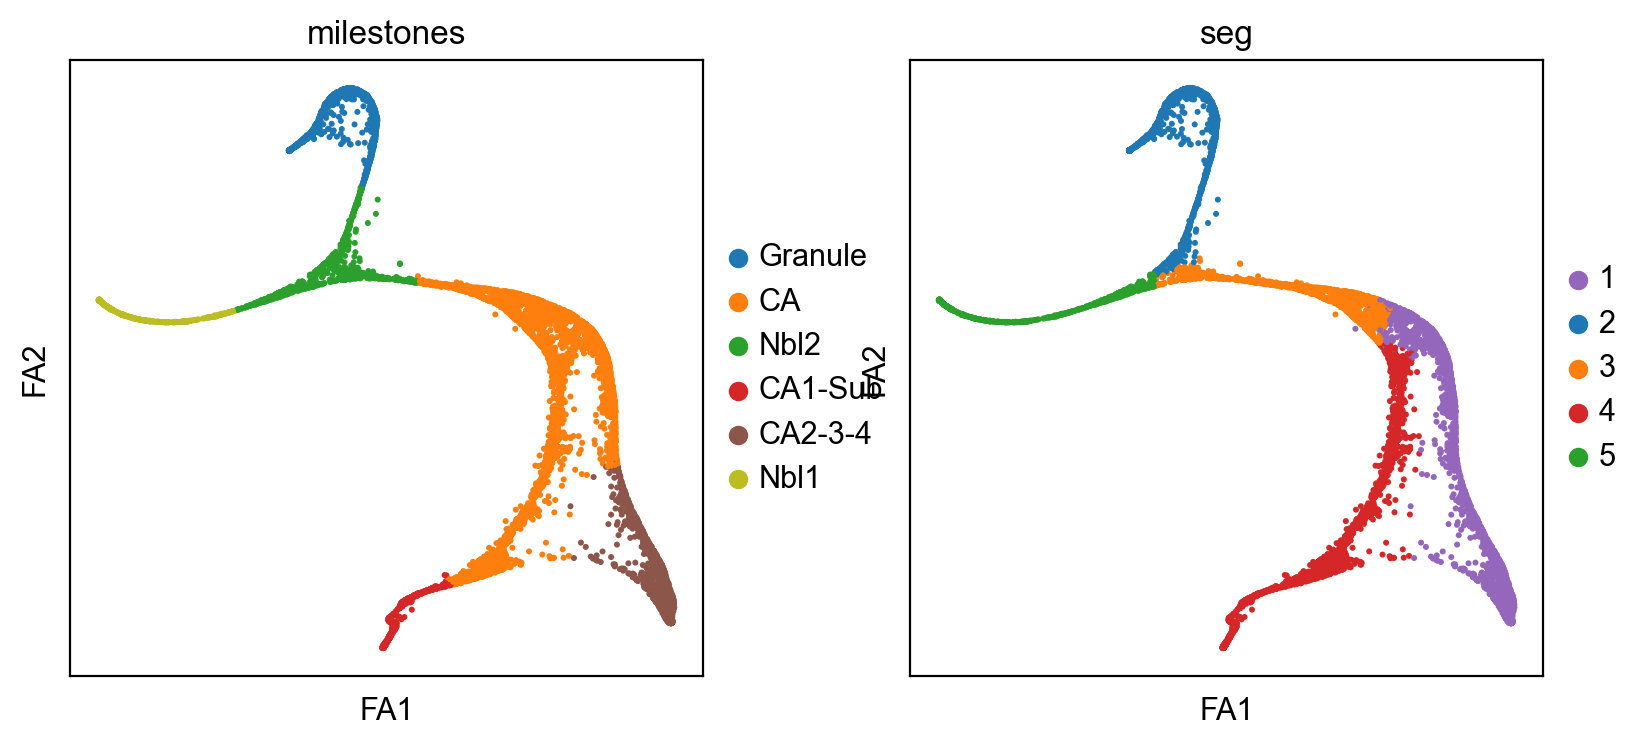

In [24]:
sc.pl.draw_graph(adata,color=["milestones","seg"])

In [25]:
adata_all=adata.copy()
scf.tl.subset_tree(adata,root_milestone="Nbl1",milestones=["Granule","CA"])

subsetting tree
node 105 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:02) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> tree extracted
--> added 
    .obs['old_milestones'], previous milestones from intial tree


In [26]:
scf.tl.pseudotime(adata,n_jobs=80,n_map=100,seed=42)

projecting cells onto the principal graph
    mappings: 100%|██████████| 100/100 [00:40<00:00,  2.47it/s]
    finished (0:00:42) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


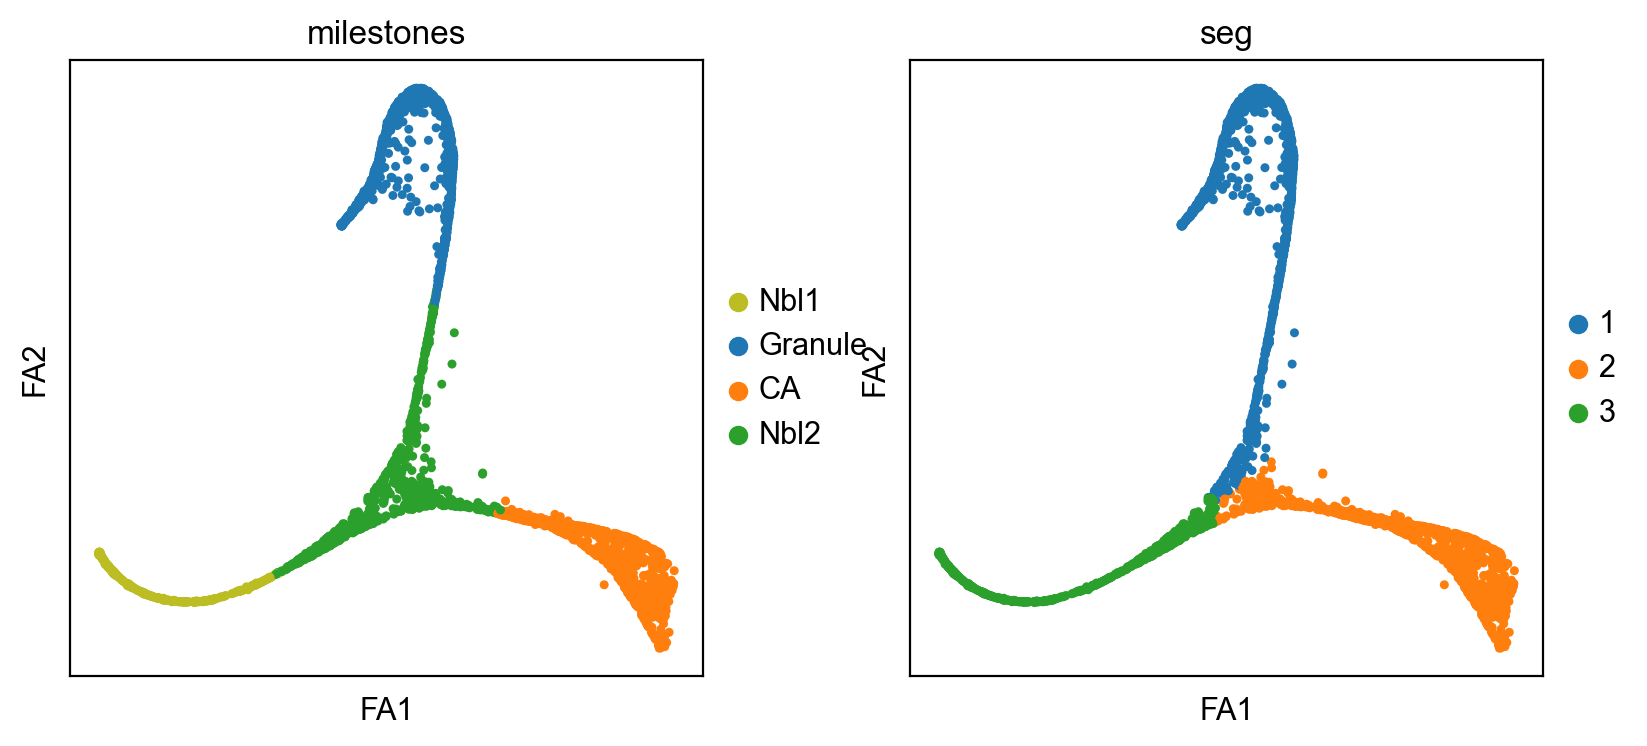

In [27]:
sc.pl.draw_graph(adata,color=["milestones","seg"])

In [28]:
scf.tl.fit(adata,scf.get.fork_stats(adata,root_milestone,milestones).index,n_jobs=40)

fit features associated with the trajectory
    single mapping : 100%|██████████| 334/334 [00:28<00:00, 11.84it/s]
    finished (adata subsetted to keep only fitted features!) (0:00:28) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


In [29]:
from scvelo.preprocessing.neighbors import get_connectivities

In [30]:
sc.pp.neighbors(adata,n_neighbors=100,use_rep="X_diffusion_multiscale",)

In [31]:
adata.layers["knn_smoothed"]=get_connectivities(adata).dot(adata.X)

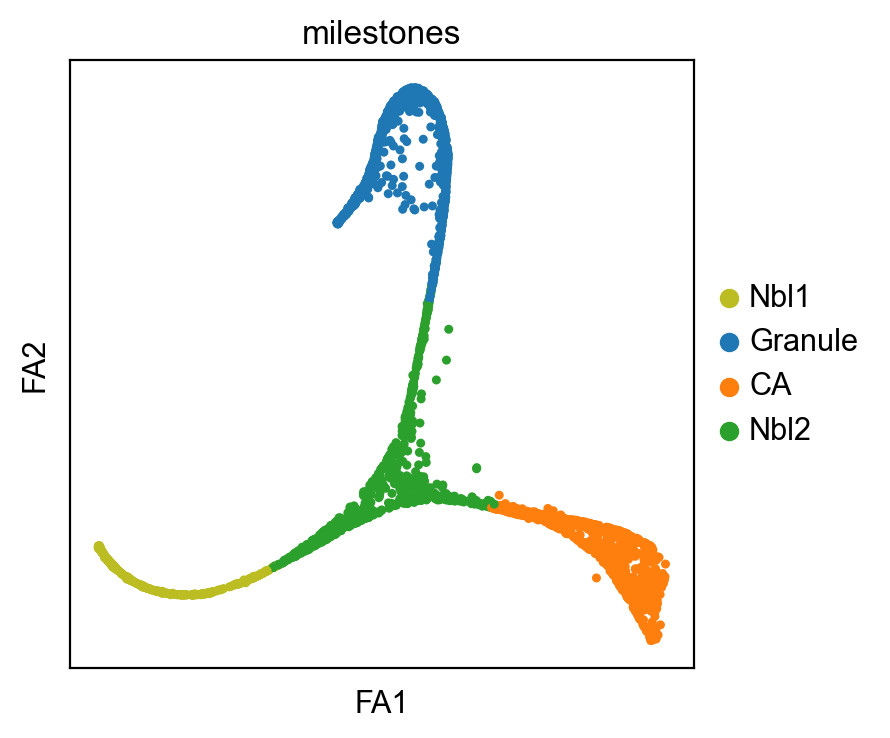

In [32]:
sc.pl.draw_graph(adata,color="milestones")

In [37]:
scf.get.fork_stats(adata,root_milestone,milestones).loc["Kcnk1"]

Granule            0.0
CA           -1.016044
de_p               0.0
fdr                0.0
signi_p            1.0
signi_fdr          1.0
up_A          0.957647
up_p               0.0
branch         Granule
activation    0.608952
module           early
Name: Kcnk1, dtype: object

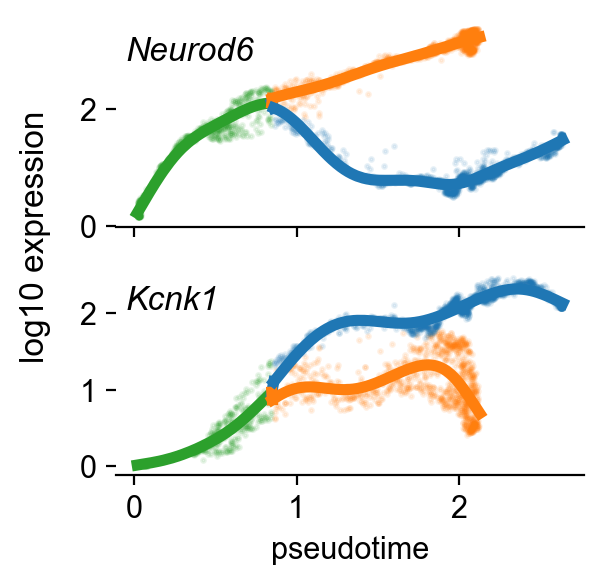

In [38]:
scv.set_figure_params(figsize=(4,4))
fig,axs=plt.subplots(2,1,sharex=True,figsize=(3,3))
scf.pl.single_trend(adata,"Neurod6",layer="knn_smoothed",
                    alpha_expr=.1,plot_emb=False,fitted_linewidth=4,show=False,ax_trend=axs[0])
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].set_xlabel("")
axs[0].set_ylabel("")
axs[0].annotate("Neurod6",(.02,.8),xycoords="axes fraction",style="italic")

scf.pl.single_trend(adata,"Kcnk1",layer="knn_smoothed",
                    alpha_expr=.1,plot_emb=False,fitted_linewidth=4,show=False,ax_trend=axs[1])

axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].set_ylabel("")


fig.text(0.02,.35,"log10 expression",fontdict=dict(rotation=90))
axs[1].annotate("Kcnk1",(.02,.8),xycoords="axes fraction",style="italic")

plt.savefig("figures/early_trends.pdf",dpi=300)

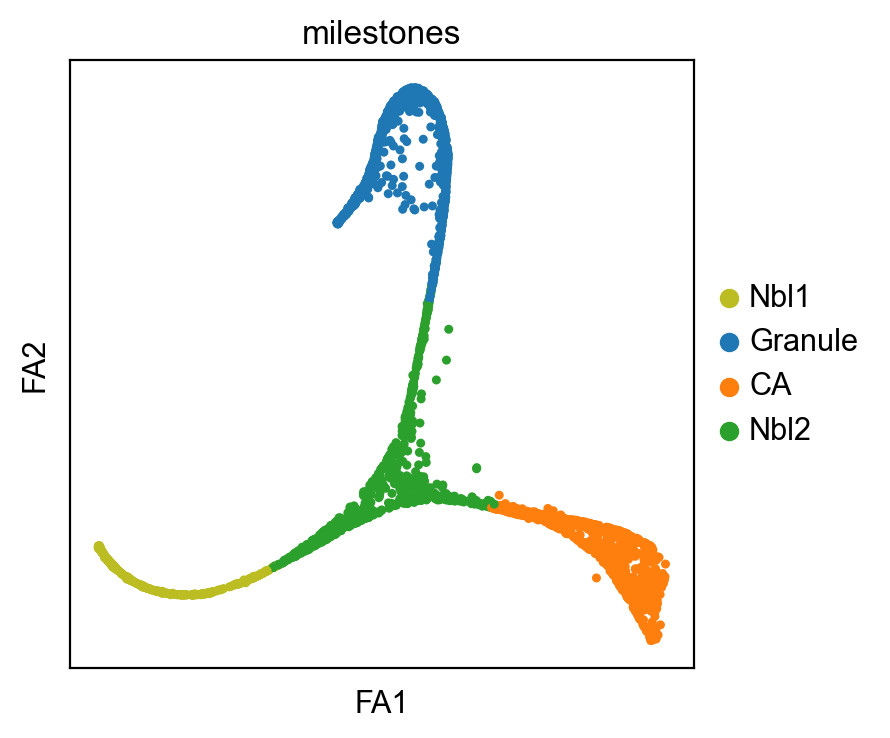

In [61]:
sc.pl.draw_graph(adata,color=["milestones"])

In [62]:
import pandas as pd
import numpy as np
adata.uns["seg_colors"]=[np.array(adata.uns["milestones_colors"])[pd.Series(adata.uns["graph"]["milestones"])==t][0] for t in adata.uns["graph"]["pp_seg"].to]

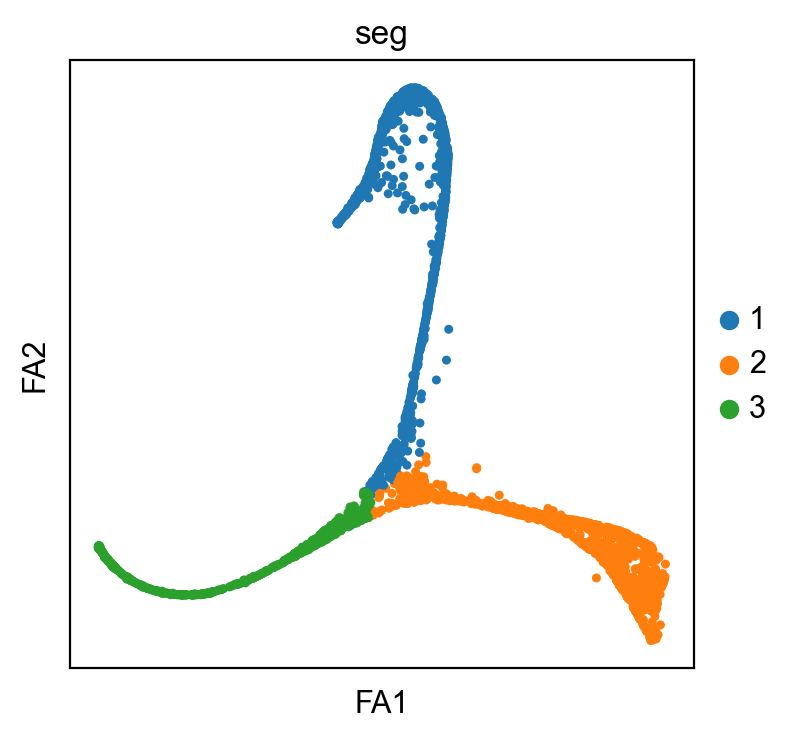

In [63]:
sc.pl.draw_graph(adata,color=["seg"])

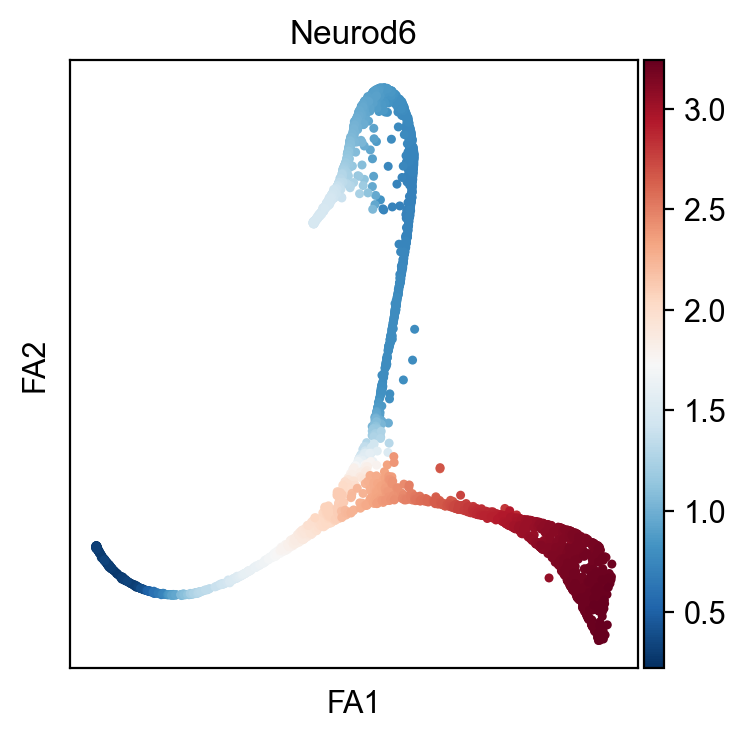

In [64]:
sc.pl.draw_graph(adata,color="Neurod6",layer="fitted")

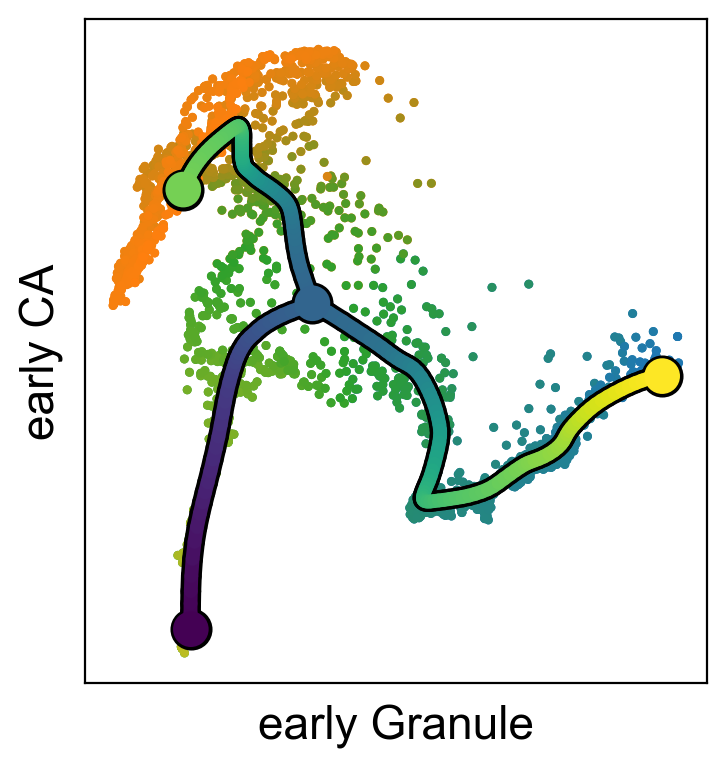

In [65]:
import matplotlib.pyplot as plt
#sc.pl.draw_graph(adata,color="seg",palette=["tab:orange","tab:blue","tab:green"])
scv.set_figure_params(figsize=(4,4),fontsize=18)
ax=scf.pl.modules(adata,root_milestone,milestones,color="seg",layer="knn_smoothed",module="early",show=False)
scf.pl.modules(adata,root_milestone,milestones,layer="knn_smoothed",show_traj=True,module="early",alpha=0,ax_early=ax,show=False)
plt.savefig("figures/upreg_early.pdf",dpi=300)

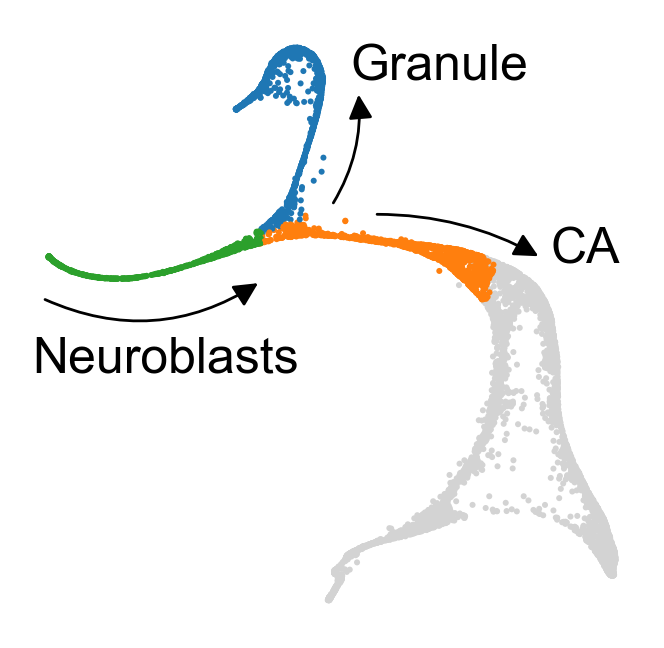

In [66]:
ax=sc.pl.draw_graph(adata_all,color=["seg"],groups=["2","3","5"],
                frameon=False,legend_loc="none",title="",show=False)
ax.annotate("",(0.02,0.55),(0.4,0.58),xycoords="axes fraction",arrowprops=dict(arrowstyle="<|-", color="k",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=-.3",
                                ))

ax.annotate("Neuroblasts",(0.02,0.42),xycoords="axes fraction")


ax.annotate("",(0.49,0.68),(0.54,0.9),xycoords="axes fraction",arrowprops=dict(arrowstyle="<|-", color="k",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=-.2",
                                ))
ax.annotate("Granule",(0.53,0.9),xycoords="axes fraction")

ax.annotate("",(0.55,0.68),(0.85,0.6),xycoords="axes fraction",arrowprops=dict(arrowstyle="<|-", color="k",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=.15",
                                ))

ax.annotate("CA",(0.85,0.6),xycoords="axes fraction")

plt.savefig("figures/hippocampus_annot.pdf")

In [67]:
fname="report"

In [68]:
%%bash -s $fname
cat<<EOF >$1.tex
\documentclass{article}
\usepackage[paperheight=142mm,paperwidth=210mm]{geometry}
\geometry{left=5mm,right=5mm,top=5mm,bottom=5mm,}
 
\usepackage[labelfont=bf]{caption}
\usepackage[rgb]{xcolor}
\usepackage{fontspec}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{graphbox,graphicx} 
\usepackage{adjustbox}

\begin{document}
\setmainfont{Arial}

\noindent
\normalsize 

\fontsize{10pt}{10pt}\selectfont


\raggedright \begin{minipage}[t]{.24\textwidth}
\raggedright\textbf{a} published hippocampus data
\includegraphics[width=\textwidth]{figures/hippocampus_annot.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{.24\textwidth}
\raggedright \textbf{c} selection of early genes
\includegraphics[width=\textwidth]{figures/early_pseudotime.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{.24\textwidth}
\raggedright \textbf{b} co-activation of modules
\includegraphics[width=\textwidth]{figures/upreg_early.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{.26\textwidth}
\raggedright \textbf{c} example of early genes
\includegraphics[width=\textwidth]{figures/early_trends.pdf}

\end{minipage}\hfill

\raggedright \textbf{d} repulsion of early gene modules prior bifurcation
\includegraphics[width=\textwidth]{figures/slide_corsCA_vs_Granule.pdf}

\clearpage
EOF
echo "\end{document}" >> $1.tex

xelatex --shell-escape $1.tex
rm $1.tex
convert -flatten -density 300 $1.pdf $1.jpg

identify $1.pdf

This is XeTeX, Version 3.14159265-2.6-0.999991 (TeX Live 2019/Debian) (preloaded format=xelatex)
 \write18 enabled.
entering extended mode
(./report.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption.sty
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption3.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-def/xetex.def))
(/usr/share/texlive/texmf-di

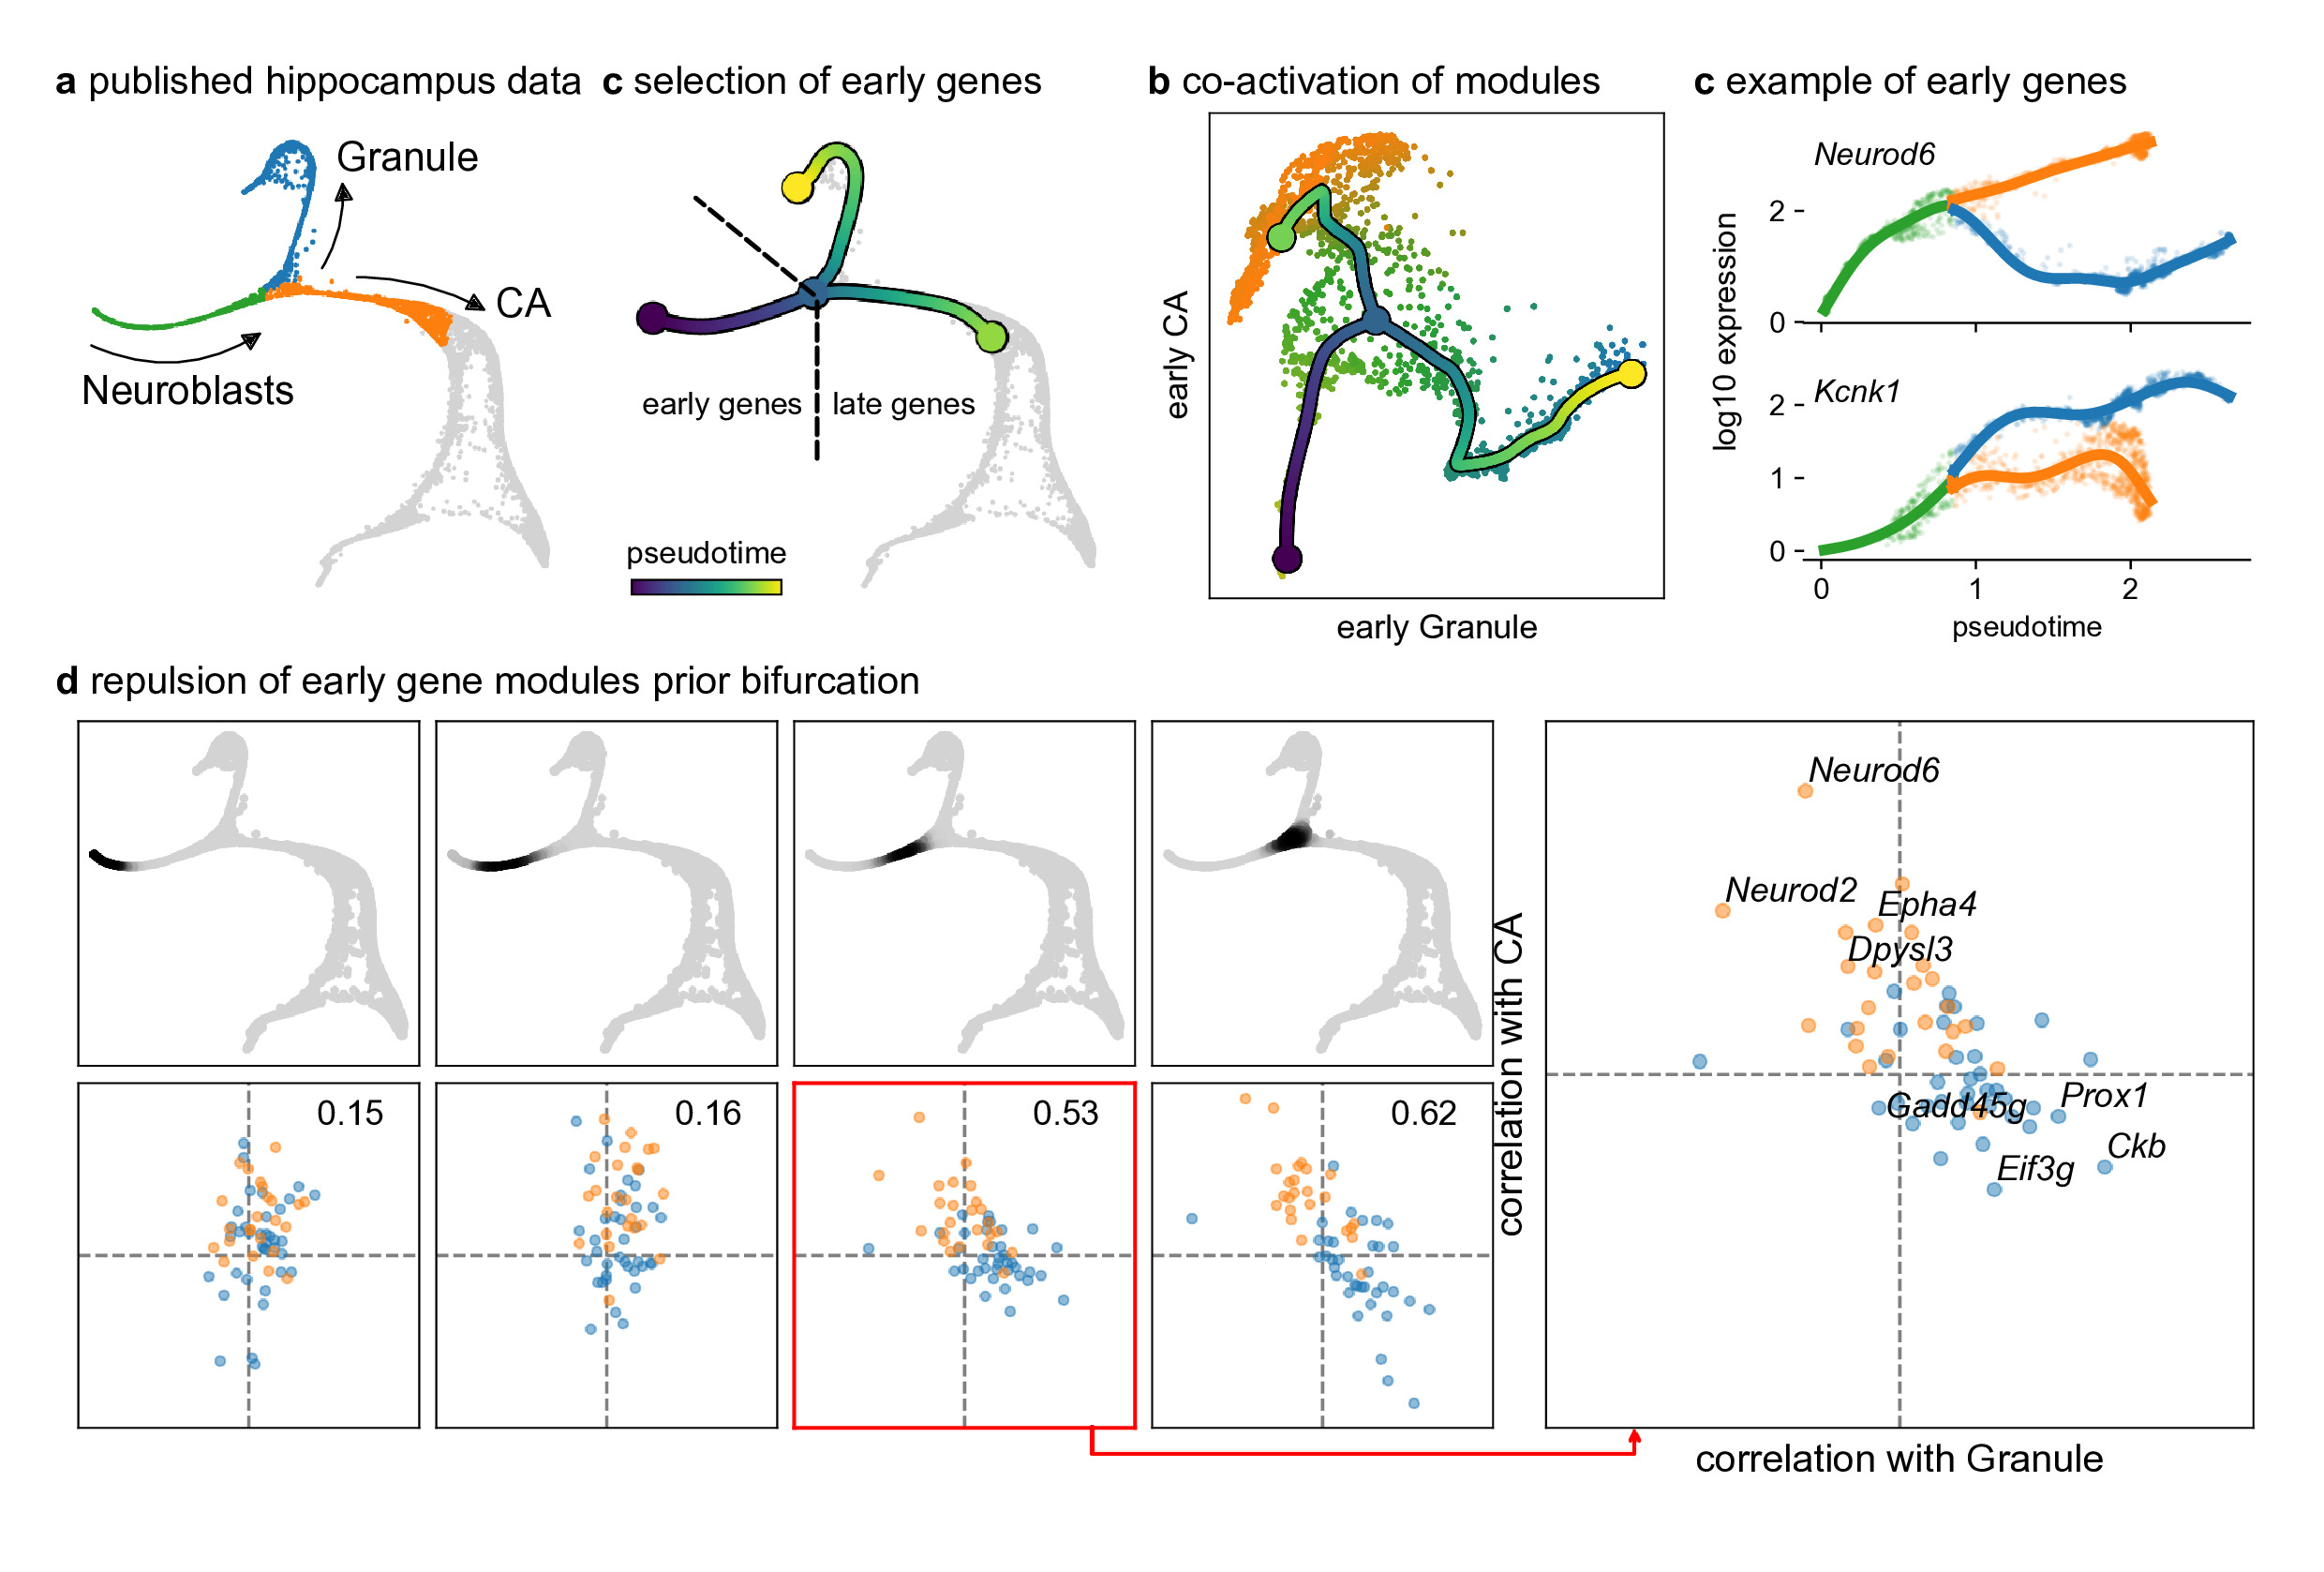

In [69]:
from IPython.display import Image
Image(filename=fname+'.jpg') 

In [44]:
adata=sc.read("adata_fitted.h5ad")

In [53]:
adata=sc.read('DentateGyrus.loom')
adata.obsm["X_tsne"]=adata.obs[['TSNE1','TSNE2']].values
adata.obs["Clusters"]=adata.obs["Clusters"].astype(str)

In [56]:
sc.pp.normalize_total(adata,target_sum=1e6)
sc.pp.log1p(adata,base=10)

In [60]:
adata_tree=sc.read("adata_fitted.h5ad")

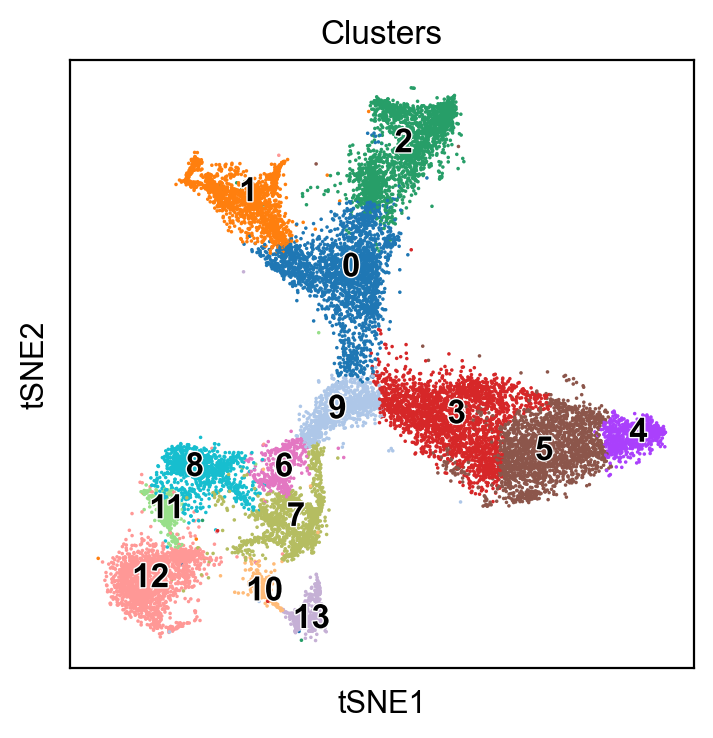

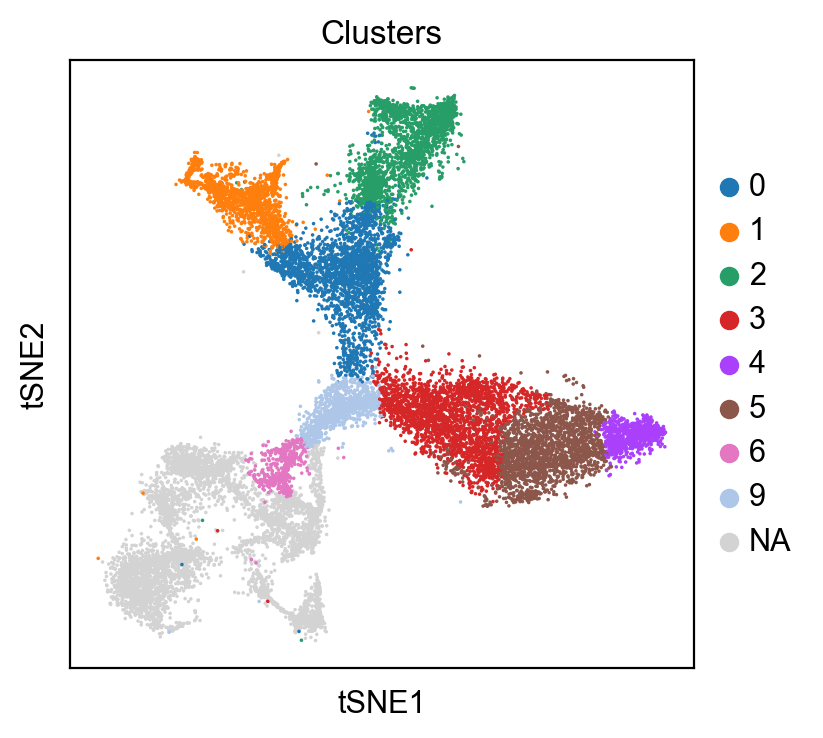

In [64]:
sc.pl.tsne(adata,color="Clusters",legend_loc="on data",legend_fontoutline=True)
sc.pl.tsne(adata,color="Clusters",groups=["6","9","0","2","1","3","5","4"])

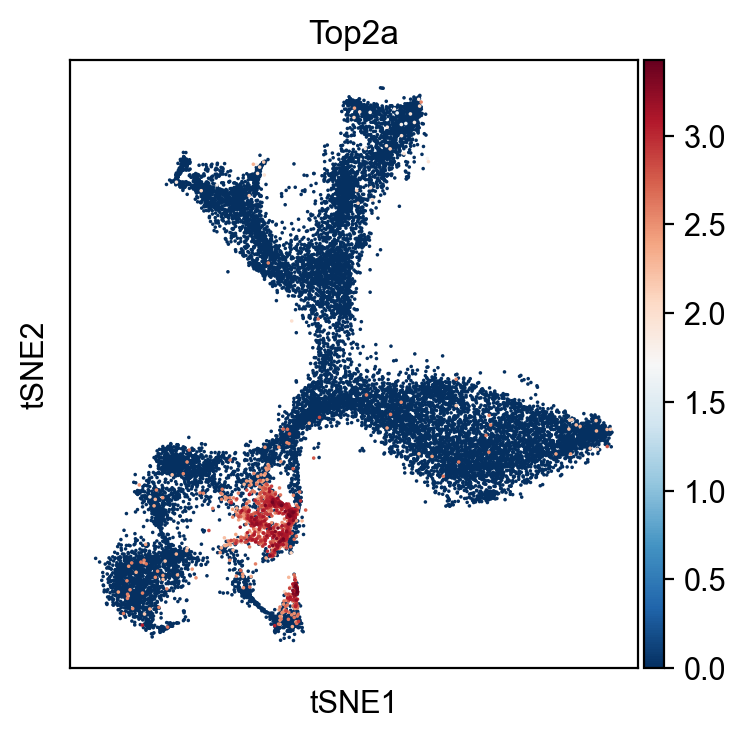

In [59]:
sc.pl.tsne(adata,color="Top2a",cmap="RdBu_r")

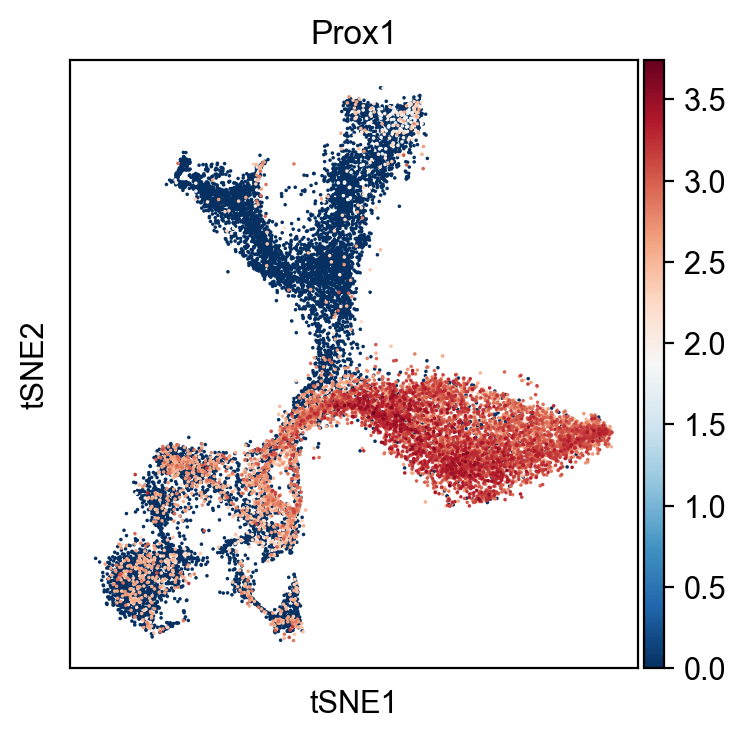

In [65]:
sc.pl.tsne(adata,color="Prox1",cmap="RdBu_r")

In [67]:
adata.var_names_make_unique()

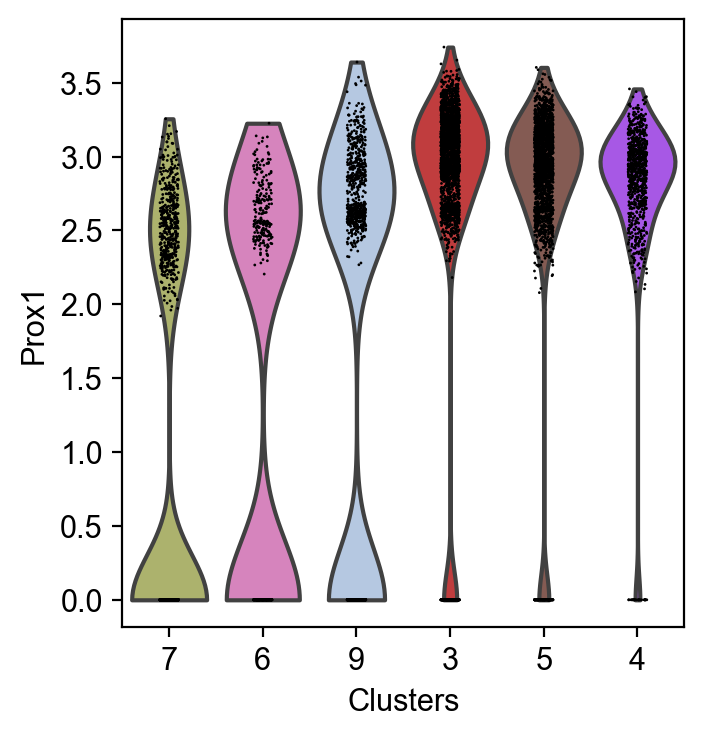

In [69]:
sc.pl.violin(adata[adata.obs.Clusters.isin(["7","6","9","3","5","4"])],"Prox1","Clusters",order=["7","6","9","3","5","4"])

In [70]:
sc.tl.rank_genes_groups(adata,"Clusters",groups=["7"],reference="6")

In [72]:
sc.get.rank_genes_groups_df(adata,"7").set_index("names").loc["Prox1"]

scores           -5.223073e+00
logfoldchanges   -1.371235e+00
pvals             2.333719e-07
pvals_adj         6.022071e-06
Name: Prox1, dtype: float64

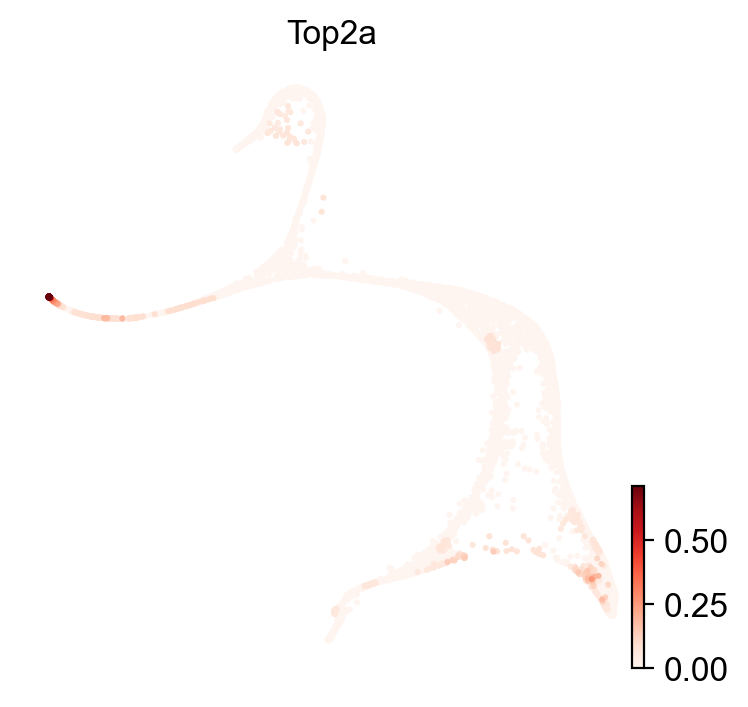

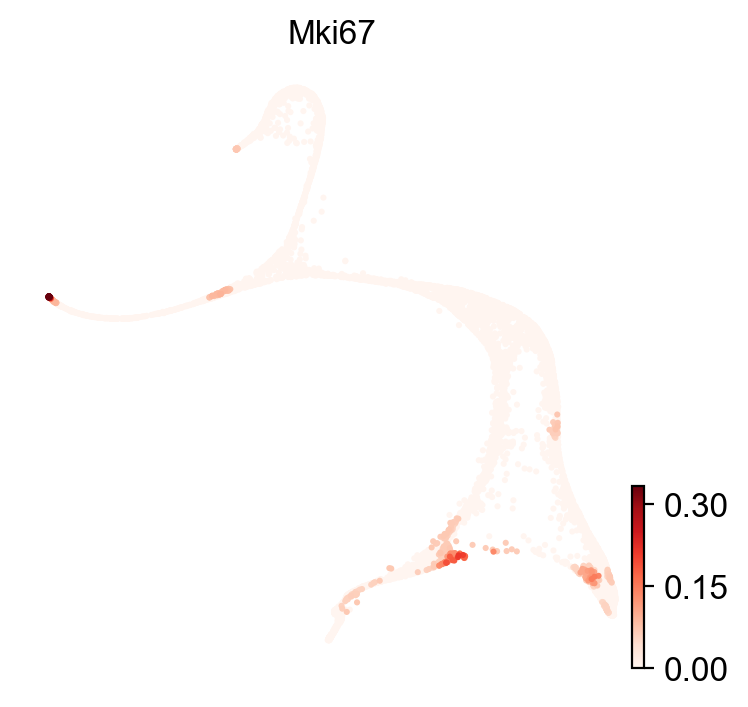

In [52]:
scv.pl.draw_graph(adata,color="Top2a",cmap="Reds",smooth=True)
scv.pl.draw_graph(adata,color="Mki67",cmap="Reds",smooth=True)